<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe67701-uncertainty-quantification](https://ndcbe.github.io/cbe67701-uncertainty-quantification);
content is available [on Github](https://github.com/ndcbe/cbe67701-uncertainty-quantification.git).*

<!--NAVIGATION-->
< [3.1 Copulas](https://ndcbe.github.io/cbe67701-uncertainty-quantification/03.01-Contributed-Example.html) | [Contents](toc.html) | [4.0 Local Sensitivity Analysis Based on Derivative Approximations](https://ndcbe.github.io/cbe67701-uncertainty-quantification/04.00-Local-Sensitivity-Analysis-Based-on-Derivative-Approximations.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/03.02-Contributed-Example.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/03.02-Contributed-Example.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

In [ ]:
# IMPORT DATA FILES USED BY THIS NOTEBOOK
import os,  requests

file_links = [("data/quarterbacks3.csv", "https://ndcbe.github.io/cbe67701-uncertainty-quantification/data/quarterbacks3.csv")]

for filepath, fileurl in file_links:
    stem, filename = os.path.split(filepath)
    if stem:
        if not os.path.exists(stem):
            os.mkdir(stem)
    if not os.path.isfile(filepath):
        with open(filepath, 'wb') as f:
            response = requests.get(fileurl)
            f.write(response.content)


# 3.2 Principal Component Analysis

Stephen Adams (sadams22@nd.edu)
6/18/2020

The following example shows an application of principal component analysis (PCA), also known as random variable reduction, the Hotelling transform, or proper orthogonal decomposition (see page 76 of textbook). PCA is commonly used in machine learning to reduce the number of components, thereby speeding up machine learning algorithms.

In this example, a scree plot will be generated. A scree plot shows how much of the variance in a data set can be attributed to each principal component (see Fig. 3.14 in the textbook).

In [1]:
## Dowload data from GitHub
import os, requests, urllib

# GitHub pages url
url = "https://ndcbe.github.io/cbe67701-uncertainty-quantification/"

# relative file paths to download
# this is the only line of code you need to change
file_paths = ['data/quarterbacks3.csv']

# loop over all files to download
for file_path in file_paths:
    print("Checking for",file_path)
    # split each file_path into a folder and filename
    stem, filename = os.path.split(file_path)
    
    # check if the folder name is not empty
    if stem:
        # check if the folder exists
        if not os.path.exists(stem):
            print("\tCreating folder",stem)
            # if the folder does not exist, create it
            os.mkdir(stem)
    # if the file does not exist, create it by downloading from GitHub pages
    if not os.path.isfile(file_path):
        file_url = urllib.parse.urljoin(url,
                urllib.request.pathname2url(file_path))
        print("\tDownloading",file_url)
        with open(file_path, 'wb') as f:
            f.write(requests.get(file_url).content)
    else:
        print("\tFile found!")

Checking for data/quarterbacks3.csv
	File found!


The data set being analyzed is the statistics of the starting quarterbacks for all 32 NFL teams in the 2019 season. The statistics can be found at https://www.pro-football-reference.com/years/2019/passing.htm. The salaries were also included and can be found at https://www.spotrac.com/nfl/rankings/2019/average/quarterback/.

In [2]:
# Import all libraries
import pandas as pd
import io
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Put data into array
qb_data = pd.read_csv('./data/quarterbacks3.csv',delimiter="\t")
# Preview
print (qb_data.head())

   Data          Player Team  Age  Games  Games Started  Wins  Losses  \
0     1      Jared Goff  LAR   25     16             16     9       7   
1     2  Jameis Winston  TAM   25     16             16     7       9   
2     3       Matt Ryan  ATL   34     15             15     7       8   
3     4       Tom Brady  NWE   42     16             16    12       4   
4     5    Carson Wentz  PHI   27     16             16     9       7   

     Salary  Completions  ...  Yards/Cmp  Yards/Game  Rating  Sacks  \
0  33500000          394  ...       11.8       289.9    86.5     22   
1   6337819          380  ...       13.4       319.3    84.3     47   
2  30000000          408  ...       10.9       297.7    92.1     48   
3  23000000          373  ...       10.9       253.6    88.0     27   
4  32000000          388  ...       10.4       252.4    93.1     37   

   Sack Yards  Net Yards/Attempt  Adjusted NY/A  Sack%  4th Quarter Comeback  \
0         170               6.90           6.46    3.4

Now perform PCA on the data set.



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys


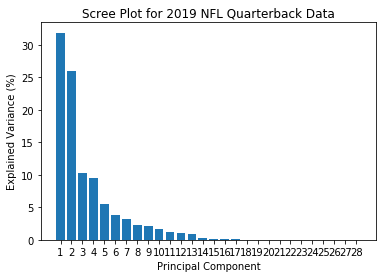

In [3]:
# Eliminate the columns with strings such as "Player" and "Team" leaving only
# numbers so that PCA can be performed.
new_qb_data = qb_data.drop(['Data','Player','Team'],axis=1) 

# To perform PCA, the data must be scaled. This adjusts the values so that each
# row has a mean of 0 and a standard deviation of 1.
scaled_qb_data = preprocessing.scale(new_qb_data)

# Perform PCA
qb_pca = PCA()
qb_pca.fit(scaled_qb_data)
qb_pca_data = qb_pca.transform(scaled_qb_data)

# Calculate the percentage of variation each principal component accounts for.

percent_variance = np.round(qb_pca.explained_variance_ratio_*100, decimals=2)
labels = [str(x) for x in range(1, len(percent_variance)+1)]
plt.bar(x=range(1,len(percent_variance)+1), height=percent_variance, tick_label=labels)
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Component')
plt.title('Scree Plot for 2019 NFL Quarterback Data')
plt.show()


Most of the variance can be explained with the first 4 principal components. Prediction algorithms will be more accurate (but slower) if more principal components are included and vice versa.

<!--NAVIGATION-->
< [3.1 Copulas](https://ndcbe.github.io/cbe67701-uncertainty-quantification/03.01-Contributed-Example.html) | [Contents](toc.html) | [4.0 Local Sensitivity Analysis Based on Derivative Approximations](https://ndcbe.github.io/cbe67701-uncertainty-quantification/04.00-Local-Sensitivity-Analysis-Based-on-Derivative-Approximations.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/03.02-Contributed-Example.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/03.02-Contributed-Example.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>